# BioModels as a source for MIRA models
MIRA can draw on BioModels and process models available in SBML format into MIRA Meta-model Templates. These Templates can then be assembled into various other modeling formalisms like Petri nets.

## Downloading a model from BioModels

First, we import the BioModel source of MIRA and use a function that returns a BioModel model's SBML XML as a string based on the model's ID, from the web.

In [1]:
from mira.sources.biomodels import get_sbml_model

sbml = get_sbml_model('BIOMD0000000955')
print(sbml[:1000])

<?xml version='1.0' encoding='UTF-8' standalone='no'?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" layout:required="false" level="3" render:required="false" version="1" xmlns:layout="http://www.sbml.org/sbml/level3/version1/layout/version1" xmlns:render="http://www.sbml.org/sbml/level3/version1/render/version1">
  <model areaUnits="area" extentUnits="substance" id="Giordano2020___SIDARTHE_model_of_COVID_19_spread_in_Italy" lengthUnits="length" metaid="COPASI0" name="Giordano2020 - SIDARTHE model of COVID-19 spread in Italy" substanceUnits="substance" timeUnits="time" volumeUnits="volume">
    <notes>
      <body xmlns="http://www.w3.org/1999/xhtml">
        <pre>This is a model created on COPASI 4.27 (Build 217) which reproduces the Figures 2b, 2d, 3b, 3d, 4b, 4d in the article - https://www.nature.com/articles/s41591-020-0883-7

To reproduce Fig 2b and 2d, set Event_trigger_Fig3b = 0, Event_trigger_Fig3d = 0, Event_trigger_Fig4b = 0, Event_trigger_Fig4d = 0, epsilon_mo

We now import the SBML source module of MIRA which provides several functions to turn SBML models into MIRA TemplateModels.

## Extracting MIRA Meta-model Templates from SBML

In [2]:
from mira.sources.sbml import template_model_from_sbml_string

In [3]:
template_model = template_model_from_sbml_string(sbml).template_model

Let's see what kinds of templates we got by processing this SBML model.

In [4]:
for idx, template in enumerate(template_model.templates):
    print(template.__class__.__name__)
    print(str(template))
    print('---')

GroupedControlledConversion
type='GroupedControlledConversion' controllers=[Concept(name='Diagnosed', identifiers={}, context={'property': 'ncit:C15220'}), Concept(name='Ailing', identifiers={}, context={'property': 'ncit:C113725'}), Concept(name='Recognized', identifiers={}, context={'property': 'ncit:C25587'})] subject=Concept(name='Susceptible', identifiers={}, context={'property': 'ido:0000468'}) outcome=Concept(name='Infected', identifiers={}, context={'property': 'ncit:C113725'}) provenance=[]
---
NaturalConversion
type='NaturalConversion' subject=Concept(name='Infected', identifiers={}, context={'property': 'ncit:C113725'}) outcome=Concept(name='Diagnosed', identifiers={}, context={'property': 'ncit:C15220'}) provenance=[]
---
NaturalConversion
type='NaturalConversion' subject=Concept(name='Infected', identifiers={}, context={'property': 'ncit:C113725'}) outcome=Concept(name='Ailing', identifiers={}, context={'property': 'ncit:C113725'}) provenance=[]
---
NaturalConversion
type=

## Visualizing the transition structure of the model
We now generate a transition model from the template model. This is the basis for visualizing the "wiring diagram" of the model and generating further model types like Petri nets and ODEs.

In [5]:
from mira.modeling import Model
transition_model = Model(template_model)

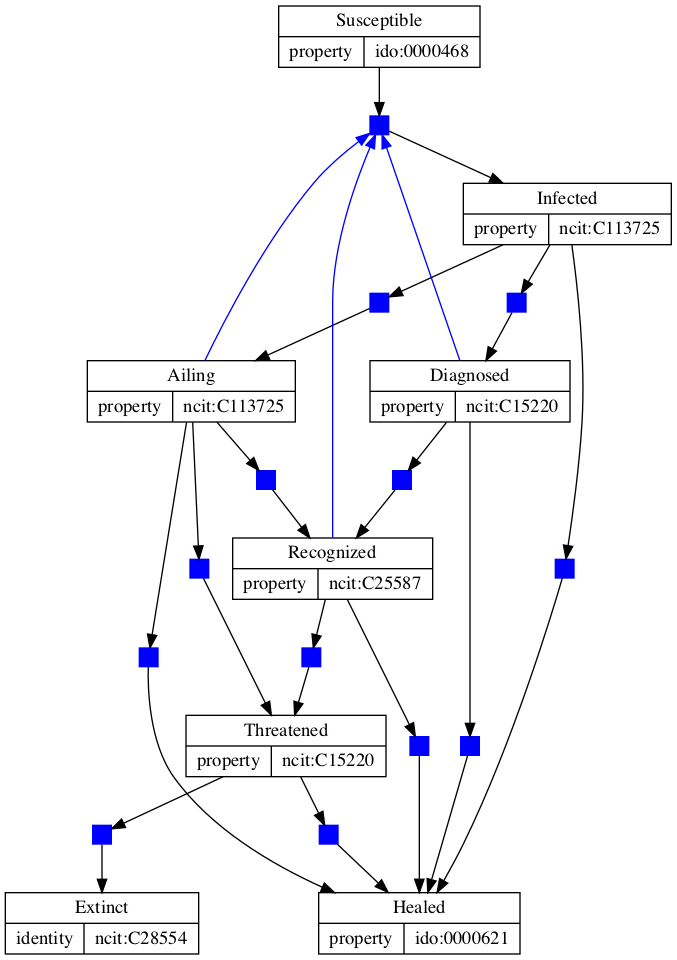

In [6]:
from mira.modeling.viz import GraphicalModel
graphical_model = GraphicalModel(transition_model)
graphical_model.write('simple.png')
from IPython.display import Image
Image('simple.png')

## Generating the model into a Petri net
We can now take the model and generate it into a Petri net model and serialize it into JSON.

In [7]:
from mira.modeling.petri import PetriNetModel
petri_model = PetriNetModel(transition_model)
petri_model.to_json()

{'S': [{'sname': "('Susceptible', ('property', 'ido:0000468'))"},
  {'sname': "('Infected', ('property', 'ncit:C113725'))"},
  {'sname': "('Diagnosed', ('property', 'ncit:C15220'))"},
  {'sname': "('Ailing', ('property', 'ncit:C113725'))"},
  {'sname': "('Recognized', ('property', 'ncit:C25587'))"},
  {'sname': "('Healed', ('property', 'ido:0000621'))"},
  {'sname': "('Threatened', ('property', 'ncit:C15220'))"},
  {'sname': "('Extinct', ('identity', 'ncit:C28554'))"}],
 'T': [{'tname': "(('Susceptible', ('property', 'ido:0000468')), ('Infected', ('property', 'ncit:C113725')), (('Diagnosed', ('property', 'ncit:C15220')), ('Ailing', ('property', 'ncit:C113725')), ('Recognized', ('property', 'ncit:C25587'))), 'GroupedControlledConversion')"},
  {'tname': "(('Infected', ('property', 'ncit:C113725')), ('Diagnosed', ('property', 'ncit:C15220')), 'NaturalConversion')"},
  {'tname': "(('Infected', ('property', 'ncit:C113725')), ('Ailing', ('property', 'ncit:C113725')), 'NaturalConversion')"},

## Modifying the model within MIRA
Let's not perform a modeling operation, for instance, by stratifying the populations into two cities between which individuals can travel. We use the `mira.modeling.ops.stratify` function to create a stratified `TemplateModel`, then assemble it into a transition Model, and visualize the model's wiring diagram.

In [8]:
from mira.metamodel.ops import stratify

In [9]:
template_model2 = stratify(template_model, key='city',
                           strata=["geonames:5128581",  # NYC
                                   "geonames:4930956",  # Boston
                                  ]
                          )

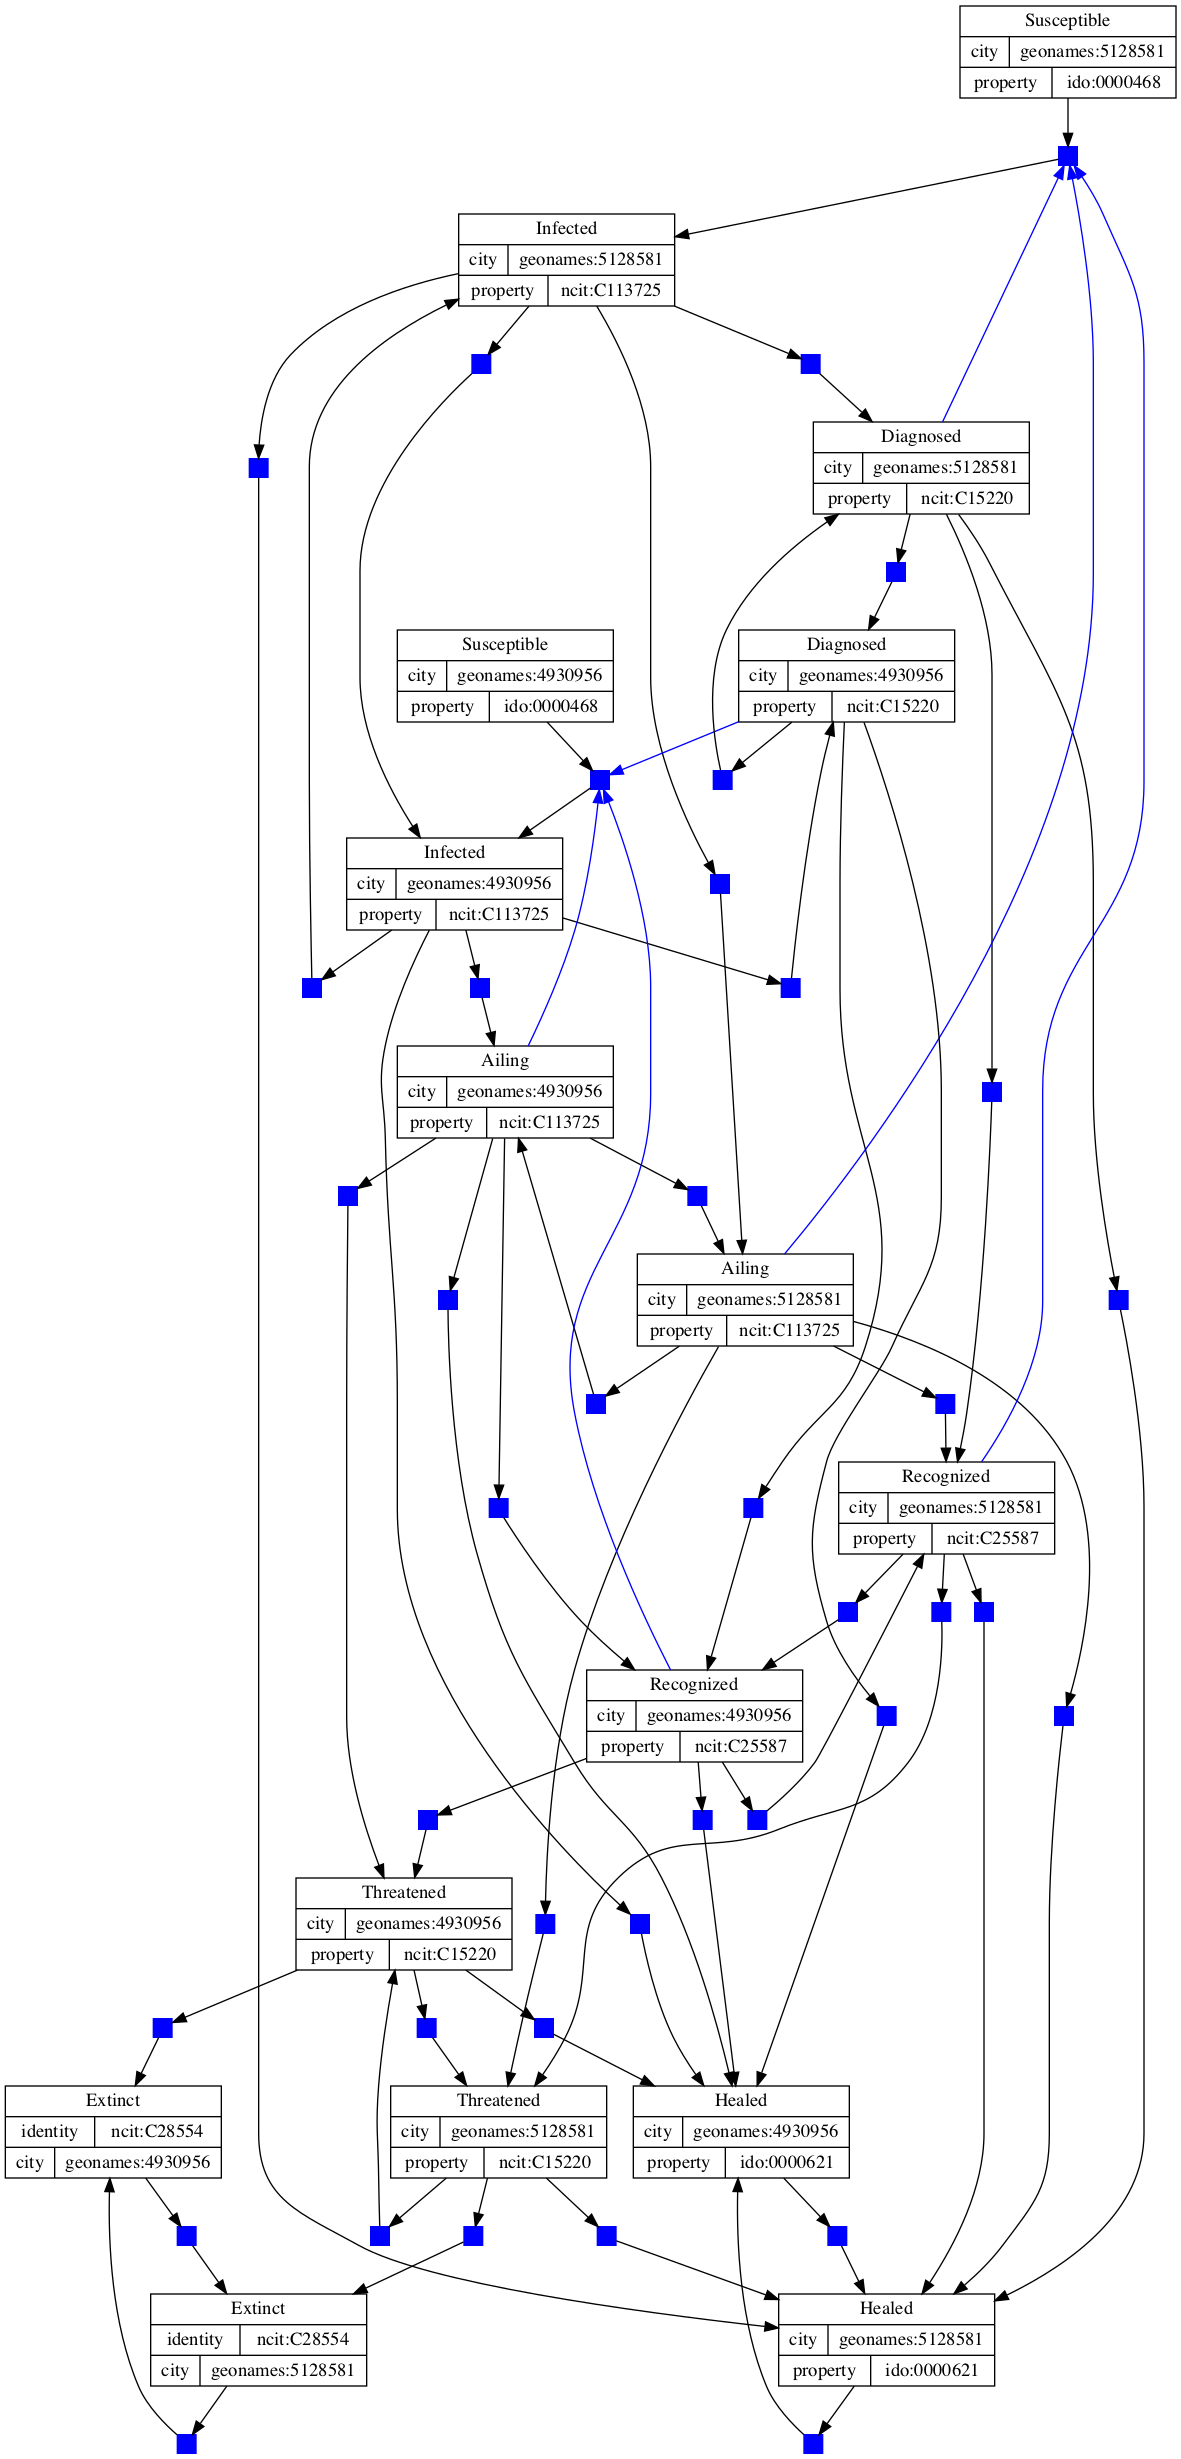

In [10]:
transition_model2 = Model(template_model2)
graphical_model2 = GraphicalModel(transition_model2)
graphical_model2.write('stratified.png')
from IPython.display import Image
Image('stratified.png')